## 8 x 8 숫자 이미지 분류
- sklearn digits 데이터셋 사용


In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def mini_mnist():
    
    digits = load_digits()
    x,y = digits.data, digits.target
    x = x / 16.0 # 정규화 0-16 -> 0-1 
    
    # 원-핫 인코딩
    y_onehot = np.eye(10)[y]
    
    x_tr, x_t, y_tr, y_t = train_test_split(
        x,y_onehot, test_size = 0.2, random_state = 0xC0FFEE
    )
    
    print("Mini MNIST Assignment")
    print(f"Train data: {x_tr.shape}")
    print(f"Test data: {x_t.shape}")
    print(f"The number of Class: 10 (0-9 number)")
    
    return (x_tr, y_tr),(x_t,y_t)
class DigitClassifier:
    def __init__(self, input_size = 64, output_size= 10):
        # 네트워크 구조 설계
        self.W = np.random.randn(input_size, output_size) * 0.5
        self.b = np.zeros((1, output_size))
    
        # 단일 층으로 구성
        self.z = None 
        self.a = None
     
    @staticmethod
    def softmax(z):
        #softmax 함수 구현
        z = z - np.max(z, axis = 1, keepdims = True)
        exp_z = np.exp(z).astype(np.float32)
        # (+1e-12)는 0으로 나누는거 방지하기 위한 수치 안정성(오차 방지용)
        return exp_z / (np.sum(exp_z, axis = 1, keepdims = True) + 1e-12)
    
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        # cross entropy 손실 구현
        # 여기서도 로그 함수에 작은 값을 더해 0으로 로그를 취하는 상황을 방지하기 위함.
        eps = 1e-12
        logp = np.log(y_pred)
        return -np.mean(np.sum(y_true * logp, axis = 1))
        
    def forward(self, x):
        # 순전파 함수 구현
        self.z = x @ self.W + self.b
        self.a = self.softmax(self.z)
        return self.a
    
    def backward(self, x, y, learning_rate = 0.1):
        # 역전파 함수 구현
        m = x.shape[0]
        dZ = (self.a - y) /m
        dW = x.T @ dZ
        db = np.sum(dZ, axis = 0, keepdims = True)
        
        # 경사하강
        self.W -= learning_rate * dW
        self.b -= learning_rate * db
      
    def predict(self, x):
        # 예측 함수
        probs = self.forward(x)
        return np.argmax(probs, axis = 1)
      
       
    def accuracy(self, x,y): 
        # 정확도 계산
        y_true = np.argmax(y, axis = 1)
        y_pred = self.predict(x)
        return np.mean(y_true == y_pred)
    
if __name__ == "__main__":
    (x_tr, y_tr), (x_t, y_t) = mini_mnist()
    
    model = DigitClassifier(input_size = 64, output_size = 10)
    
    epochs = 100
    learning_rate = 0.5
    
    for ep in range(1, epochs+1):
        probs = model.forward(x_tr)
        loss = model.cross_entropy_loss(probs, y_tr)
        model.backward(x_tr, y_tr, learning_rate = learning_rate)
        
        if ep % 10 == 0 or ep ==1:
            acc_tr = model.accuracy(x_tr, y_tr)
            acc_te = model.accuracy(x_t, y_t)
            print(f"[{ep:03d}/{epochs}] loss={loss:.4f} | acc_tr={acc_tr*100:.1f}% | acc_te={acc_te*100:.1f}%")

    # 모델 학습 및 평가 
    print("\n구현 후 다음을 확인하세요:")
    print("- 훈련 정확도 : 90% 이상")
    print("- 테스트 정확: 85% 이상")
    print("- 각 숫자별 예측 성능")
    
mini_mnist()

Mini MNIST Assignment
Train data: (1437, 64)
Test data: (360, 64)
The number of Class: 10 (0-9 number)
[001/100] loss=3.5584 | acc_tr=5.0% | acc_te=5.3%
[010/100] loss=2.0995 | acc_tr=27.0% | acc_te=24.7%
[020/100] loss=1.4350 | acc_tr=59.4% | acc_te=55.3%
[030/100] loss=1.0685 | acc_tr=76.1% | acc_te=73.1%
[040/100] loss=0.8579 | acc_tr=84.1% | acc_te=80.0%
[050/100] loss=0.7252 | acc_tr=86.6% | acc_te=83.6%
[060/100] loss=0.6348 | acc_tr=88.0% | acc_te=85.3%
[070/100] loss=0.5693 | acc_tr=89.0% | acc_te=86.4%
[080/100] loss=0.5195 | acc_tr=90.2% | acc_te=87.2%
[090/100] loss=0.4802 | acc_tr=90.7% | acc_te=87.2%
[100/100] loss=0.4483 | acc_tr=91.2% | acc_te=87.5%

구현 후 다음을 확인하세요:
- 훈련 정확도 : 90% 이상
- 테스트 정확: 85% 이상
- 각 숫자별 예측 성능
Mini MNIST Assignment
Train data: (1437, 64)
Test data: (360, 64)
The number of Class: 10 (0-9 number)


((array([[0.    , 0.    , 0.5625, ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.75  , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.0625, 0.8125, ..., 0.0625, 0.    , 0.    ],
         [0.    , 0.0625, 0.8125, ..., 0.9375, 0.1875, 0.    ],
         [0.    , 0.    , 0.25  , ..., 0.    , 0.    , 0.    ]],
        shape=(1437, 64)),
  array([[0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 0., 1.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], shape=(1437, 10))),
 (array([[0.    , 0.    , 0.4375, ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.25  , 0.    , 0.    ],
         [0.    , 0.    , 0.125 , ..., 1.    , 0.3125, 0.    ],
         ...,
         [0.    , 0.0625, 0.875 , ..., 0.25  , 0.    , 0.    ],
         [0.    , 0.    , 0. 

In [ ]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


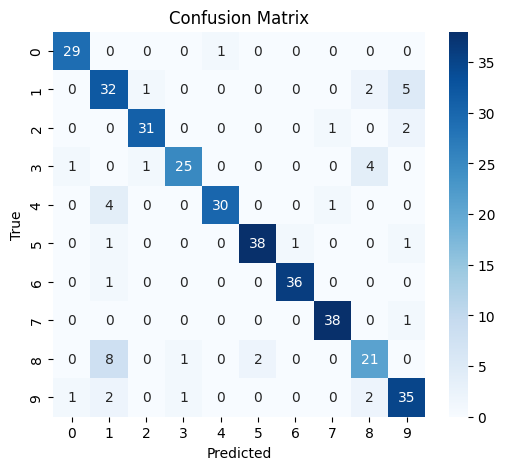

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

# 각 클래스별 정답과 예측이 얼마나 일치했는지 확인

y_true = np.argmax(y_t, axis=1)       # one-hot → 라벨
y_pred = model.predict(x_t)           # 모델 예측

cm = confusion_matrix(y_true, y_pred, labels=range(10))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
